# **Project Name**    - Productionization of ML Systems



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Sudip Bairagi


# **Project Summary -**

In the realm of travel and tourism, the intersection of data analytics and machine learning presents an opportunity to revolutionize the way travel experiences are curated and delivered. This capstone project revolves around a trio of datasets - users, flights, and hotels - each providing a unique perspective on travel patterns and preferences. The goal is to leverage these datasets to build and deploy sophisticated machine learning models, serving a dual purpose: enhancing predictive capabilities in travel-related decision-making and mastering the art of MLOps through hands-on application.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**1. Regression Model Development:

Build a regression model to predict the price of a flight using the flights.csv dataset. Focus on feature selection, model training, and validation to ensure accuracy and reliability.

2. REST API for Regression Model:

Develop a REST API using Flask to serve the flight price prediction model, enabling real-time price predictions.

3. Containerization:

Package and deploy the flight price prediction model using Docker, ensuring portability and ease of deployment.

4. Kubernetes for Scalability:

Deploy the model using Kubernetes to manage scalability and handle varying loads efficiently.

5. Automated Workflows with Apache Airflow:

Design and implement automated workflows for managing the travel data, specifically for the regression models. Develop Directed Acyclic Graphs (DAGs) to orchestrate complex workflows in an efficient and manageable way.

6. CI/CD Pipeline with Jenkins:

Implement a Continuous Integration/Continuous Deployment (CI/CD) pipeline using Jenkins for consistent and reliable deployment of the travel price prediction model..**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd

### Dataset Loading

In [27]:
# Load Dataset
# load flights.csv
flights = pd.read_csv('flights.csv')
# load hotels.csv
hotels = pd.read_csv('hotels.csv')
# load users.csv
users = pd.read_csv('users.csv')

### Dataset First View

In [3]:
# Dataset First Look
flights.head()


,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [4]:
hotels.head()


,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019


In [17]:
users.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


## Data Analysis #

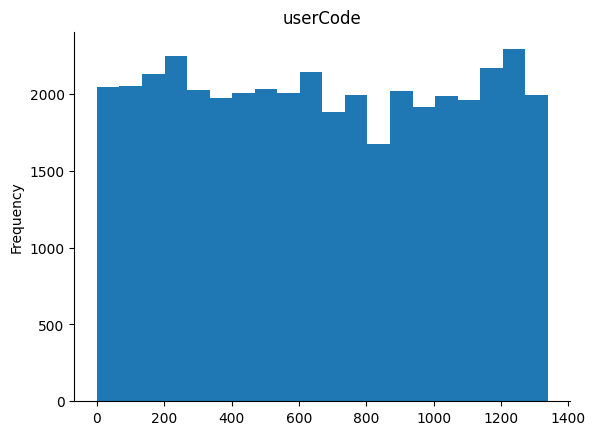

In [5]:
# @title userCode

from matplotlib import pyplot as plt
hotels['userCode'].plot(kind='hist', bins=20, title='userCode')
plt.gca().spines[['top', 'right',]].set_visible(False)

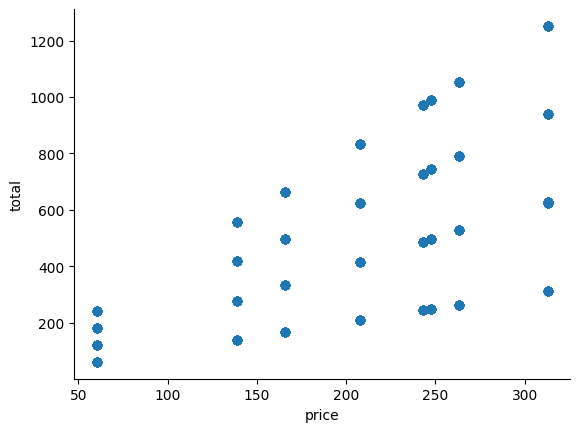

In [6]:
# @title price vs total

from matplotlib import pyplot as plt
hotels.plot(kind='scatter', x='price', y='total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:

users.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


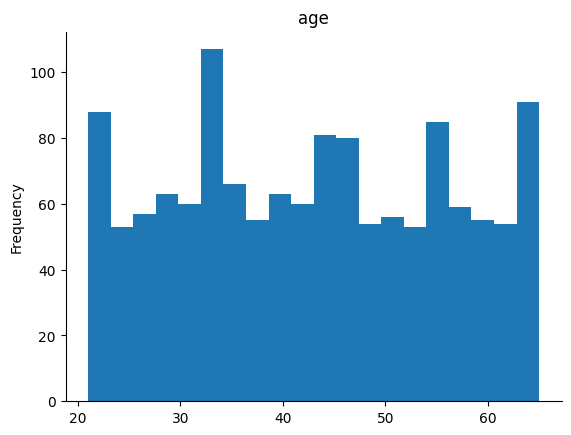

In [8]:
# @title age

from matplotlib import pyplot as plt
users['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

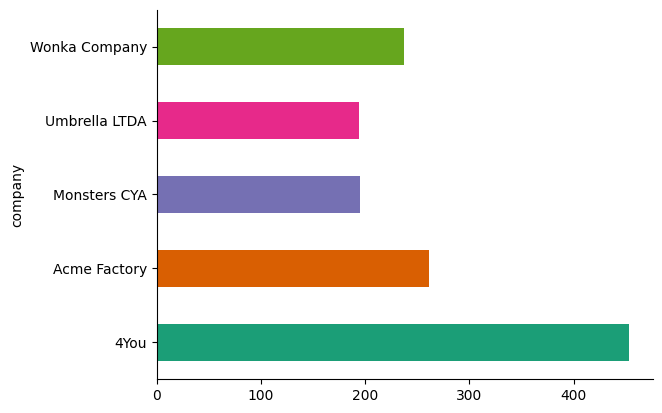

In [9]:
# @title company

from matplotlib import pyplot as plt
import seaborn as sns
users.groupby('company').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count for flights
flights.duplicated().sum()
# Dataset Duplicate Value Count for hotels
hotels.duplicated().sum()
# Dataset Duplicate Value Count for users
users.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count hotels
hotels.isnull().sum()
# Missing Values/Null Values Count users
users.isnull().sum()
# Missing Values/Null Values Count flights
flights.isnull().sum()

travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns description
print(flights.describe(include='all'))
print(hotels.describe(include='all'))
print(users.describe(include='all'))

           travelCode       userCode                from                  to  \
count   271888.000000  271888.000000              271888              271888   
unique            NaN            NaN                   9                   9   
top               NaN            NaN  Florianopolis (SC)  Florianopolis (SC)   
freq              NaN            NaN               57317               57317   
mean     67971.500000     667.505495                 NaN                 NaN   
std      39243.724665     389.523127                 NaN                 NaN   
min          0.000000       0.000000                 NaN                 NaN   
25%      33985.750000     326.000000                 NaN                 NaN   
50%      67971.500000     659.000000                 NaN                 NaN   
75%     101957.250000    1011.000000                 NaN                 NaN   
max     135943.000000    1339.000000                 NaN                 NaN   

        flightType         price       

## 3. ***Data Wrangling***

In [16]:
# Merge datasets on userCode
import pandas as pd
combined_df = pd.merge(
    flights,
    pd.merge(hotels, users, left_on='userCode', right_on='code'),
    on='travelCode'
)
combined_df.head()



,travelCode,userCode_x,from,to,flightType,price_x,time,distance,agency,date_x,...,place,days,price_y,total,date_y,code,company,name_y,gender,age
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,...,Florianopolis (SC),4,313.02,1252.08,09/26/2019,0,4You,Roy Braun,male,21
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,...,Florianopolis (SC),4,313.02,1252.08,09/26/2019,0,4You,Roy Braun,male,21
2,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,...,Salvador (BH),2,263.41,526.82,10/10/2019,0,4You,Roy Braun,male,21
3,2,0,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,10/12/2019,...,Salvador (BH),2,263.41,526.82,10/10/2019,0,4You,Roy Braun,male,21
4,7,0,Aracaju (SE),Salvador (BH),economic,964.83,2.16,830.86,CloudFy,11/14/2019,...,Salvador (BH),3,263.41,790.23,11/14/2019,0,4You,Roy Braun,male,21


# Data Visualization

<Axes: xlabel='flightType', ylabel='price'>

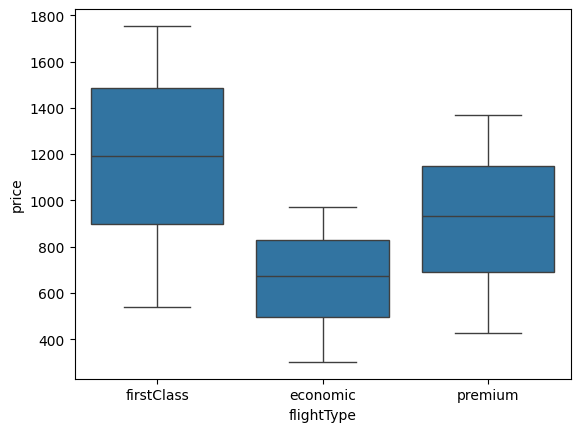

In [19]:
import seaborn as sns
sns.boxplot(x='flightType', y='price', data=flights)

<Axes: xlabel='days', ylabel='price'>

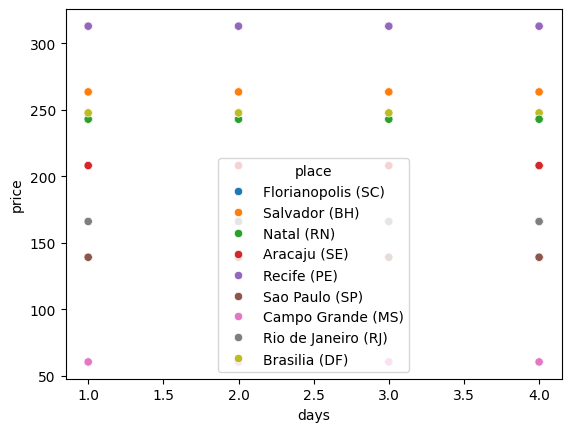

In [20]:
sns.scatterplot(x='days', y='price', hue='place', data=hotels)

<Axes: xlabel='age', ylabel='Count'>

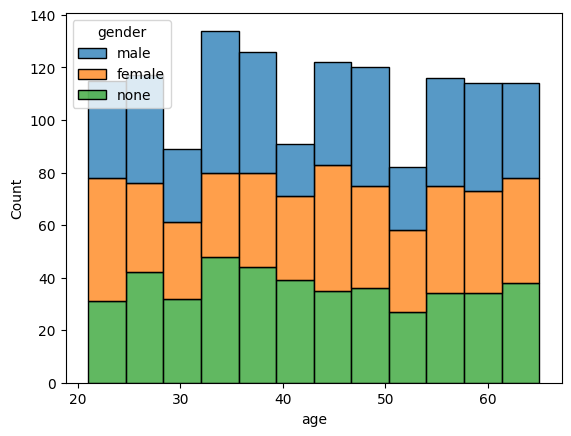

In [21]:
sns.histplot(x='age', hue='gender', data=users, multiple='stack')

<Axes: xlabel='distance', ylabel='price'>

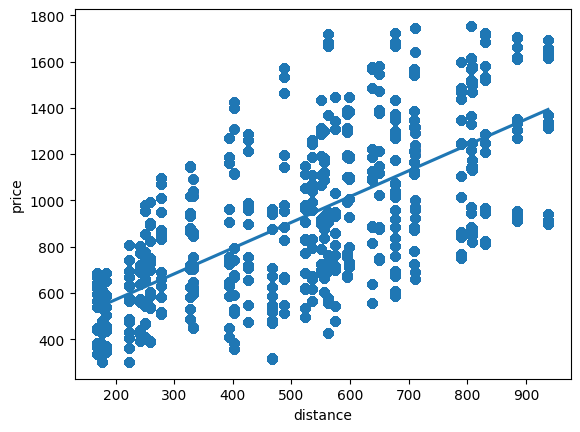

In [22]:
sns.regplot(x='distance', y='price', data=flights)

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
combined_df['flightType_encoded'] = encoder.fit_transform(combined_df['flightType'])


Answer Here.

### 2. Handling Outliers

In [28]:
# Handling Outliers & Outlier treatments for flights data
from scipy import stats
flight_price_mean = stats.trim_mean(flights['price'], proportiontocut=0.05)
hotel_price_mean= stats.trim_mean(hotels['price'], proportiontocut=0.05)
users_age_mean = stats.trim_mean(users['age'], proportiontocut=0.05)

flights['price'] = flights['price'].apply(lambda x: x if x <= 1000 else flight_price_mean)
# Handling Outliers & Outlier treatments for hotels data
hotels['price'] = hotels['price'].apply(lambda x: x if x <= 500 else hotel_price_mean)
# Handling Outliers & Outlier treatments for users data
users['age'] = users['age'].apply(lambda x: x if x <= 100 else users_age_mean)
# Handling Missing Values 

## Feature Selection

In [49]:
# Encode your categorical columns
flights.head()
flights_data = flights[['flightType', 'price', 'distance', 'time','agency']]
flights_data.head()

# shuffle the data
flights_data = flights_data.sample(frac=1, random_state=42).reset_index(drop=True)

# find unique values in flightType
unique_flight_types = flights_data['flightType'].unique()
unique_flight_types
# unique flightType counts
flight_type_counts = flights_data['flightType'].value_counts()
flight_type_counts

X = flights_data.drop('price', axis=1)
Y= flights_data['price']






#### 2. Train Test Split


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# unique values of flightType in X_train and X_test
unique_flight_types_train = X_train['flightType'].unique()
unique_flight_types_test = X_test['flightType'].unique()
print("Unique flightType in X_train:", unique_flight_types_train)
print("Unique flightType in X_test:", unique_flight_types_test)

Unique flightType in X_train: ['premium' 'economic' 'firstClass']
Unique flightType in X_test: ['firstClass' 'premium' 'economic']


### 5. Data Transformation

In [55]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder

flightType_encoder = LabelEncoder()
agency_encoder = LabelEncoder()

X_train['flightType_encoded'] = flightType_encoder.fit_transform(X_train['flightType'])
X_train['agency_encoded'] = agency_encoder.fit_transform(X_train['agency'])

X_test['flightType_encoded'] = flightType_encoder.transform(X_test['flightType'])
X_test['agency_encoded'] = agency_encoder.transform(X_test['agency'])

# Drop original categorical columns
X_train = X_train.drop(['flightType', 'agency'], axis=1)
X_test = X_test.drop(['flightType', 'agency'], axis=1)  

### 6. Data Scaling

In [56]:
X_train.describe(include='all')

,distance,time,flightType_encoded,agency_encoded
count,244699.000000,244699.000000,244699.000000,244699.000000
mean,546.901414,1.421007,1.002158,1.001083
std,208.818852,0.542458,0.755981,0.925929
min,168.220000,0.440000,0.000000,0.000000
25%,401.660000,1.040000,0.000000,0.000000
50%,562.140000,1.460000,1.000000,1.000000
75%,676.530000,1.760000,2.000000,2.000000
max,937.770000,2.440000,2.000000,2.000000


In [57]:
Y_train.describe()

count    244699.000000
mean        802.925291
std         185.196501
min         301.510000
25%         672.660000
50%         904.000000
75%         950.643347
max         998.180000
Name: price, dtype: float64

## ***7. ML Model Implementation***

### ML Model - 1 : Random Forest Flight Price predictor model

In [ ]:
# implement a random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)  


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [59]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
Y_pred = rf_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2) 

Mean Squared Error: 5816.577944613706
R-squared: 0.8297810843101414


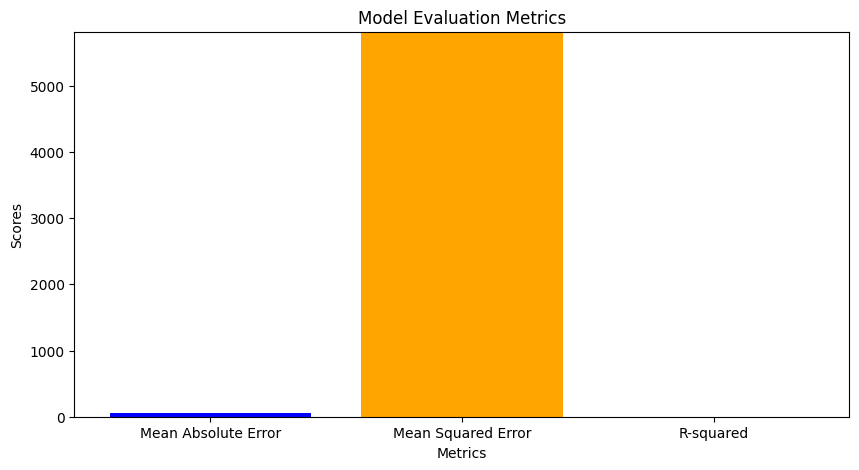

In [60]:
# Visualizing evaluation Metric Score chart the model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt 
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Plotting the evaluation metrics
metrics = ['Mean Absolute Error', 'Mean Squared Error', 'R-squared']
scores = [mae, mse, r2]
plt.figure(figsize=(10, 5))
plt.bar(metrics, scores, color=['blue', 'orange', 'green'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.ylim(0, max(scores) + 1)
plt.show()  

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.) 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 15],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],        
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'log2']
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)   
# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best parameters from GridSearchCV:", best_params)    
# Fit the model with best parameters
rf_model_best = RandomForestRegressor(**best_params, random_state=42)
rf_model_best.fit(X_train, Y_train) 





Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_esti

/media/sudip/linux-extra/code/almabetter/prodmlsys/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/media/sudip/linux-extra/code/almabetter/prodmlsys/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/media/sudip/linux-extra/code/almabetter/prodmlsys/.venv/lib/python3.10/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
  File "/media/sudip/linux-extra/code/almabetter/prodmls

Best parameters from GridSearchCV: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 15}


,n_estimators,15
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [63]:
# Predict on the model
Y_pred_best = rf_model_best.predict(X_test)
# Evaluate the model with best parameters
mse_best = mean_squared_error(Y_test, Y_pred_best)
r2_best = r2_score(Y_test, Y_pred_best)
print("Mean Squared Error with best parameters:", mse_best)
print("R-squared with best parameters:", r2_best)   

Mean Squared Error with best parameters: 5816.48842178441
R-squared with best parameters: 0.8297837041459069


## ***8.*** ***Save the RegressorModel ***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [66]:
# Save the File
import joblib

# get the fitted ecoder and model
joblib.dump(flightType_encoder, 'flightType_encoder.pkl')
print("FlightType encoder saved as flightType_encoder.pkl")
joblib.dump(agency_encoder, 'agency_encoder.pkl')
print("Agency encoder saved as agency_encoder.pkl")
joblib.dump(rf_model_best, 'rf_model_best.pkl')
print("Model saved as rf_model_best.pkl")

FlightType encoder saved as flightType_encoder.pkl
Agency encoder saved as agency_encoder.pkl
Model saved as rf_model_best.pkl


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [65]:
# Load the File and predict unseen data.

loaded_model = joblib.load('rf_model_best.pkl')
# Predict on new data
new_data = X_test.sample(5)  # Sample 5 rows from the test set
predictions = loaded_model.predict(new_data)
print("Predictions on new data:", predictions)
print("Actual values:", Y_test.loc[new_data.index].values)
print("New data features:\n", new_data)

Predictions on new data: [761.30778163 769.75710335 636.02209791 833.55324836 950.64334696]
Actual values: [636.51       587.85       548.62       950.64334696 950.64334696]
New data features:
         distance  time  flightType_encoded  agency_encoded
90801     637.56  1.66                   0               0
18097     676.56  1.76                   0               0
167790    425.98  1.11                   0               2
224637    573.81  1.49                   2               2
238116    808.85  2.10                   1               0


In [69]:
# load encoders and model
flightType_encoder = joblib.load('flightType_encoder.pkl')
agency_encoder = joblib.load('agency_encoder.pkl')
rf_model_best = joblib.load('rf_model_best.pkl')

# test with a new data point from flights dataset
# Use valid values from your training data
new_flight_data = pd.DataFrame({
    'distance': [1000],
    'time': [2],        
    'flightType': ['premium'],  # valid: 'premium', 'firstClass', 'economic'
    'agency': ['Rainbow']       # valid: 'Rainbow', 'CloudFy', 'FlyingDrops'
})

# predict the price for the new data point
new_flight_data['flightType_encoded'] = flightType_encoder.transform(new_flight_data['flightType'])
new_flight_data['agency_encoded'] = agency_encoder.transform(new_flight_data['agency'])
new_flight_data = new_flight_data.drop(['flightType', 'agency'], axis=1)
predicted_price = rf_model_best.predict(new_flight_data)
print("Predicted price for the new flight data:", predicted_price[0])

Predicted price for the new flight data: 950.6433469553932


## Flask API to call the regressor

In [70]:
# Define a function for Flask app that take flightType, agency, distance, time as input and return the predicted price
def predict_flight_price(flightType, agency, distance, time):
    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        'flightType': [flightType],
        'agency': [agency],
        'distance': [distance],
        'time': [time]
    })

    
    # load encoders and model
    flightType_encoder = joblib.load('flightType_encoder.pkl')
    agency_encoder = joblib.load('agency_encoder.pkl')
    rf_model_best = joblib.load('rf_model_best.pkl')
    
    # Encode the categorical features
    input_data['flightType_encoded'] = flightType_encoder.transform(input_data['flightType'])
    input_data['agency_encoded'] = agency_encoder.transform(input_data['agency'])
    
    # Drop the original categorical columns
    input_data = input_data.drop(['flightType', 'agency'], axis=1)
    
    # Predict the price using the loaded model
    predicted_price = rf_model_best.predict(input_data)
    
    return predicted_price[0]  # Return the predicted price

In [71]:
# implement a simple Flask app to serve the model
from flask import Flask, request, jsonify
app = Flask(__name__)
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    flightType = data['flightType']
    agency = data['agency']
    distance = data['distance']
    time = data['time']
    
    # Call the prediction function
    predicted_price = predict_flight_price(flightType, agency, distance, time)
    
    return jsonify({'predicted_price': predicted_price})

In [76]:
# call the Flask Rest API
if __name__ == '__main__':
    app.run(debug=True, host='localhost', port=5002)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://localhost:5002
Press CTRL+C to quit
 * Restarting with stat
Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/media/sudip/linux-extra/code/almabetter/prodmlsys/.venv/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/media/sudip/linux-extra/code/almabetter/prodmlsys/.venv/lib/python3.10/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/media/sudip/linux-extra/code/almabetter/prodmlsys/.venv/lib/python3.10/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
  File "/media/sudip/linux-extra/code/almabetter/prodmlsys/.venv/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 692, in initi

SystemExit: 1

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***